In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('fifa_data.csv')

In [3]:
data.shape

(18207, 89)

In [4]:
data.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [5]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### 1) How many players ?

In [6]:
No_of_players = len(data.Name)
No_of_players

18207

### 2) Players most preferred foot

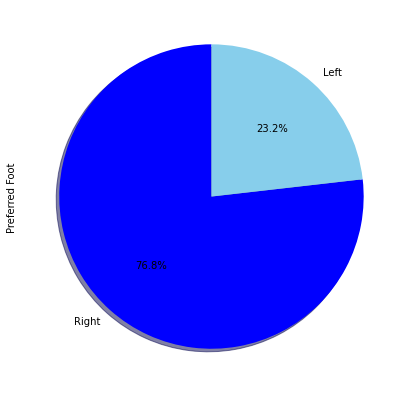

In [7]:
foot_overall = pd.DataFrame(columns = ['Name','Preferred Foot','Overall'])
foot_overall['Preferred Foot'] = data['Preferred Foot']
foot_overall.Overall = data.Overall
foot_overall.Name = data.Name
colors = ['blue','skyblue']
foot_overall['Preferred Foot'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',shadow=True, startangle=90,
                                             colors=colors)
plt.show()

### 3) Nations with the the most players in the game's top 100 rated players

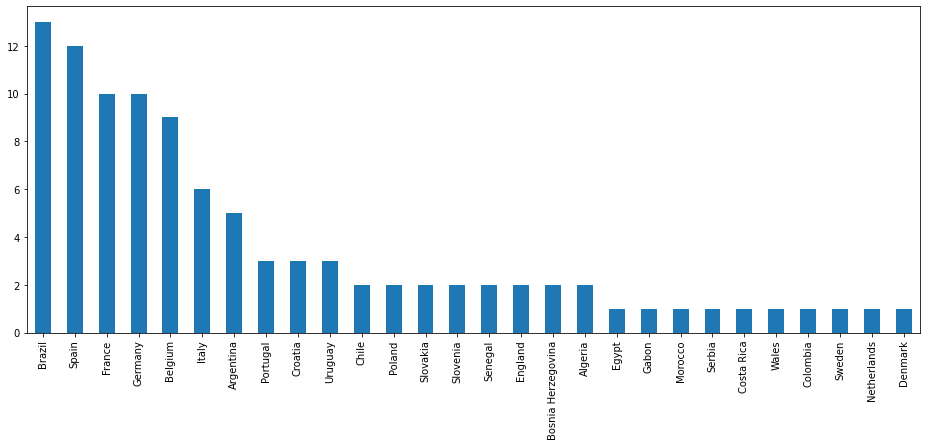

In [8]:
data.sort_values(by='Overall',ascending=False)['Nationality'][:100].value_counts().plot(kind='bar',figsize=(16,6))
plt.show()

### 4) Clubs with the highest cummulative overall player ratings

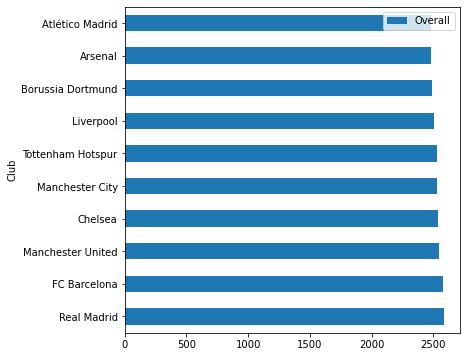

In [9]:
ques4 = pd.DataFrame(data.groupby('Club')['Overall'].sum())
ques4.sort_values(by='Overall',ascending=False)[:10].plot(kind='barh',figsize=(6,6))
plt.show()

### 5) Who's the Oldest, Youngest player and the players age distribution

Youngest Player: W. Geubbels 16 Years Old , Oldest Player: O. Pérez 45 Years Old


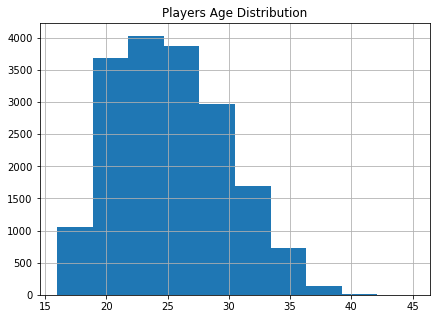

In [10]:
youngest , oldest = list(data['Age']).index(min(data.Age)) , list(data['Age']).index(max(data.Age))
print('Youngest Player:',list(data.Name)[youngest],min(data.Age),'Years Old',',','Oldest Player:',list(data.Name)[oldest],max(data.Age),'Years Old')
data.Age.hist(figsize=(7,5))
plt.title('Players Age Distribution')
plt.show()

### 6) Relationship between the overall ratings and players potentials

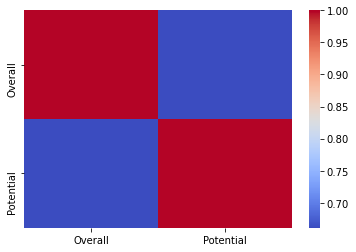

In [11]:
quest6 = data.iloc[:,7:9]
sns.heatmap(quest6.corr(),cmap='coolwarm')
plt.show()

### 7) Who are the best players in every position in the game

In [12]:
def counter(data):
    front = data.str[:2].astype(int)
    back = data.str[-1].astype(int)
    return front+back
positions = data.loc[:,['Name','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]
positions = positions.dropna()
Position = positions.drop('Name',axis=1)
for x in Position.columns:
    Position[x] = counter(Position[x])
#position['Name'] = Position['Name']
for x in Position.columns:
    rating = max(Position[x])
    current_position = list(Position[x])
    player = list(positions['Name'])[current_position.index(rating)]
    best_player = f'Best {x}, is {player} with {rating} rating'
    print(best_player)

Best LS, is Cristiano Ronaldo with 94 rating
Best ST, is Cristiano Ronaldo with 94 rating
Best RS, is Cristiano Ronaldo with 94 rating
Best LW, is L. Messi with 94 rating
Best LF, is L. Messi with 95 rating
Best CF, is L. Messi with 95 rating
Best RF, is L. Messi with 95 rating
Best RW, is L. Messi with 94 rating
Best LAM, is L. Messi with 95 rating
Best CAM, is L. Messi with 95 rating
Best RAM, is L. Messi with 95 rating
Best LM, is L. Messi with 93 rating
Best LCM, is L. Modrić with 91 rating
Best CM, is L. Modrić with 91 rating
Best RCM, is L. Modrić with 91 rating
Best RM, is L. Messi with 93 rating
Best LWB, is N. Kanté with 88 rating
Best LDM, is N. Kanté with 90 rating
Best CDM, is N. Kanté with 90 rating
Best RDM, is N. Kanté with 90 rating
Best RWB, is N. Kanté with 88 rating
Best LB, is Sergio Ramos with 87 rating
Best LCB, is Sergio Ramos with 90 rating
Best CB, is Sergio Ramos with 90 rating
Best RCB, is Sergio Ramos with 90 rating
Best RB, is Sergio Ramos with 87 rating


### 8) Future of the game?
Who are the players aged 21 and below with the highest potential,their Ages and Clubs

In [13]:
young_players = data[data['Age'] <= 21]
young_players = young_players.loc[:,['Name','Age','Club','Potential']]
pd.DataFrame(young_players.sort_values('Potential',ascending=False)[:10])

,Name,Age,Club,Potential
25,K. Mbappé,19,Paris Saint-Germain,95
229,G. Donnarumma,19,Milan,93
156,Gabriel Jesus,21,Manchester City,92
1143,Vinícius Júnior,17,Real Madrid,92
155,O. Dembélé,21,FC Barcelona,92
226,M. de Ligt,18,Ajax,91
415,H. Aouar,20,Olympique Lyonnais,90
228,Arthur,21,FC Barcelona,90
734,A. Lafont,19,Fiorentina,90
1070,P. Cutrone,20,Milan,89


### 9) PLayers Weight * Height Distribution

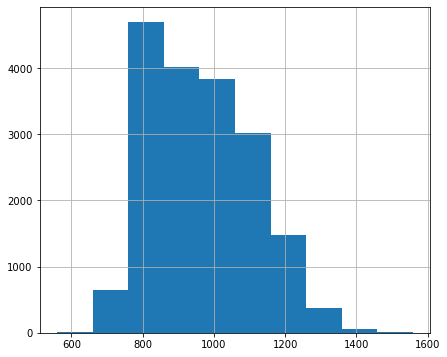

In [14]:
data['Mass'] = data['Weight'].str.strip('lbs').astype(float)*data['Height'].str.replace("'",'.').astype(float)
data['Mass'].hist(figsize=(7,6))
plt.show()

### 10) Most popular Jersey Number among Players 

Based on the Large number of Jersey Choices amongst players, only the top 10 most popular were referenced

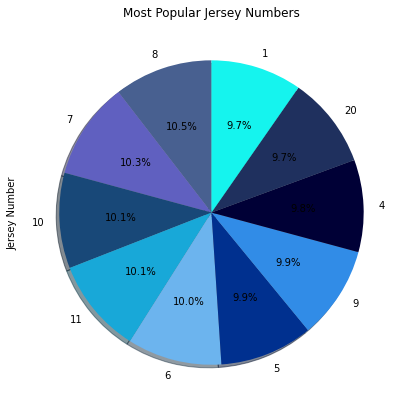

In [15]:
popular_jerseys = data['Jersey Number'].copy()
popular_jerseys = popular_jerseys.dropna()
colors = ['#486090','#6060C0','#184878','#18A8D8','#6CB4EE','#00308F','#318CE7','#000036','#1F305E','#15F4EE']
popular_jerseys.astype(int).value_counts()[:10].plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',shadow=True,
                                            startangle=90,colors=colors)
plt.title('Most Popular Jersey Numbers')
plt.show()

### 11) Clubsides that pay the most wages

In [16]:
copied = data.copy()
copied['Wage'] = copied['Wage'].str.strip('€,K')
copied['Wage'] = copied['Wage'].astype(int)*1000 # K in thousand
big_payers = pd.DataFrame(copied.groupby('Club').sum()['Wage'])
big_payers.sort_values('Wage',ascending=False)[:5]

,Wage
Club,
Real Madrid,5017000
FC Barcelona,4837000
Manchester City,3741000
Manchester United,3391000
Juventus,3292000


### 12) Football Highest Earners and their Ratings 
From  the  highest  earner  down

In [17]:
pmwar = data.loc[ : ,['Name','Wage','Overall']]
pmwar['Wage'] = pmwar['Wage'].str.strip('€ , K')
#pmwar['Wage'] = copied['Wage'].str.strip('K')
pmwar['Wage'] = pmwar['Wage'].astype(int)*1000 # K in thousand
pmwar.sort_values('Wage',ascending=False)[:10]

,Name,Wage,Overall
0,L. Messi,565000,94
7,L. Suárez,455000,91
6,L. Modrić,420000,91
1,Cristiano Ronaldo,405000,94
8,Sergio Ramos,380000,91
11,T. Kroos,355000,90
36,G. Bale,355000,88
4,K. De Bruyne,355000,91
5,E. Hazard,340000,91
32,Coutinho,340000,88


### 13) Clubsides with the Highest PLayers out on loan
Not Chelsea???

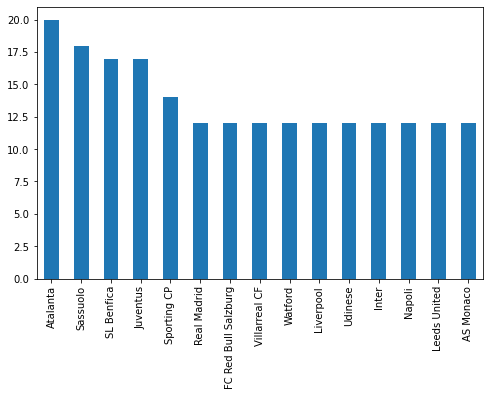

In [18]:
data['Loaned From'].value_counts()[:15].plot(kind='bar',figsize=(8,5))
plt.show()

### 14) Players with the highest Release Clauses and Their Ratings

In [19]:
release_clause = data.loc[: ,['Name','Release Clause','Overall']]
release_clause['Release Clause'] = release_clause['Release Clause'].str.strip('€')
release_clause['Release Clause'] = release_clause['Release Clause'].str.strip('M')
release_clause = release_clause[:100]
release_clause['Release Clause'] = release_clause['Release Clause'].astype(float)*1000000 #Since its in millions
release_clause = pd.DataFrame(release_clause.sort_values(by='Release Clause',ascending=False)[:10])
release_clause = release_clause.set_index('Name')
release_clause

,Release Clause,Overall
Name,,
Neymar Jr,228100000.0,92
L. Messi,226500000.0,94
K. De Bruyne,196400000.0,91
E. Hazard,172100000.0,91
K. Mbappé,166100000.0,88
A. Griezmann,165800000.0,89
L. Suárez,164000000.0,91
H. Kane,160700000.0,89
T. Kroos,156800000.0,90
